# SVM Exercises

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

Load Pima diabetes dataset

In [ ]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url, names=names)


     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]


Split data into training, validation, and test sets with a test size of 25%

In [ ]:
# YOUR CODE HERE
test_size = 0.25
X_cols = ["preg", "plas", "pres", "skin", "test", "mass", "pedi", "age"]
y_col = ['class']
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)

# Further split X and y of training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

Create a model with sklearn's SVC and a high gamma value (perhaps 1.0)

In [ ]:
# YOUR CODE HERE
svm = SVC(gamma=1)
svm.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=1)

Print accuracy of training and validation data

In [ ]:
# YOUR CODE HERE
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  61.80555555555556


Create a model with sklearn's SVC and a low gamma value (perhaps .001)

In [ ]:
# YOUR CODE HERE
svm = SVC(gamma=0.001)
svm.fit(X_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.001)

Print accuracy of training and validation data

In [ ]:
# YOUR CODE HERE
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  83.33333333333334
Validation Accuracy is  70.83333333333334


Explain the accuracy results below. 

The model with high gamma was overfit

Print the confusion matrices for your high and low gamma models (both numeric and visualized)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-20-bae9ba449a2e>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, fontsize=16)
<ipython-input-20-bae9ba449a2e>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, fontsize=16)
Training Accuracy is  100.0
Validation Accuracy is  61.80555555555556
[[89  0]
 [55  0]]
Training Accuracy is  83.333333333333

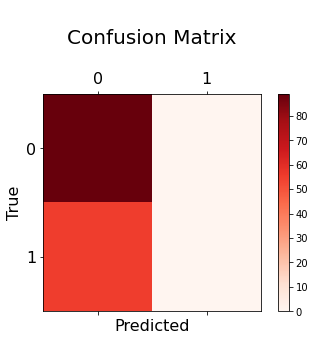

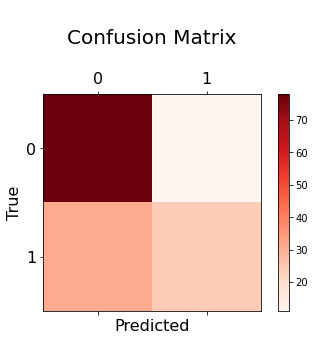

In [ ]:
svm = SVC(gamma=1)
svm.fit(X_train, y_train)
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
labels = [0,1]
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
cm_high_gamma = metrics.confusion_matrix(y_val, y_val_pred,labels=labels)
print(cm_high_gamma)

svm = SVC(gamma=0.001)
svm.fit(X_train, y_train)
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)
cm_low_gamma = metrics.confusion_matrix(y_val, y_val_pred,labels=labels)
print(cm_low_gamma)

def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  
plot_cmatrix(cm_high_gamma,labels)
plot_cmatrix(cm_low_gamma,labels)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6682294-4076-472f-b6a3-592ed81e5f9c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>